In [1]:
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

## Q1

In [2]:
df = pd.read_csv('salary.csv')
# Display the first few rows of the dataframe
print(df.head())

   salary  experience
0     1.7         1.2
1     2.4         1.5
2     2.3         1.9
3     3.1         2.2
4     3.7         2.4


In [4]:
# Define features and target variable
X = df[['experience']].values  # Features (experience)
y = df['salary'].values  # Target variable (salary)

# Initialize SGDRegressor
sgd_regressor = SGDRegressor(max_iter=1, warm_start=True)

In [5]:
# Lists to store the values for plotting
epochs = []
errors = []

# Perform SGD with varying epochs
for epoch in range(1, 101):  # 100 epochs
    sgd_regressor.fit(X, y)
    y_pred = sgd_regressor.predict(X)
    error = mean_squared_error(y, y_pred)
    
    epochs.append(epoch)
    errors.append(error)
    
    # Print coefficients every 10 epochs for observation
    if epoch % 10 == 0:
        print(f'Epoch: {epoch}, B0: {sgd_regressor.intercept_[0]}, B1: {sgd_regressor.coef_[0]}, Error: {error}')

Epoch: 10, B0: 0.42839110539487996, B1: 1.4122155888252463, Error: 0.25757146468591424
Epoch: 20, B0: 0.392578046431848, B1: 1.4244343406986804, Error: 0.2540012066930241
Epoch: 30, B0: 0.3602946035769355, B1: 1.435187572313787, Error: 0.2510509624905982
Epoch: 40, B0: 0.33323952686956665, B1: 1.4520644146058017, Error: 0.24871955024223336
Epoch: 50, B0: 0.3012810698330758, B1: 1.4600107130918039, Error: 0.24614332792344962
Epoch: 60, B0: 0.27446538941074156, B1: 1.4651981027223804, Error: 0.24426223913889186
Epoch: 70, B0: 0.25211299455689146, B1: 1.474461486591422, Error: 0.2427566718204807
Epoch: 80, B0: 0.23454561698150206, B1: 1.4806714025538739, Error: 0.24168292192377608
Epoch: 90, B0: 0.21388920891326887, B1: 1.4870478946002605, Error: 0.24050269655111223
Epoch: 100, B0: 0.19299869848626866, B1: 1.4896899378054638, Error: 0.2395324430615491


/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/lib/python3/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Ma

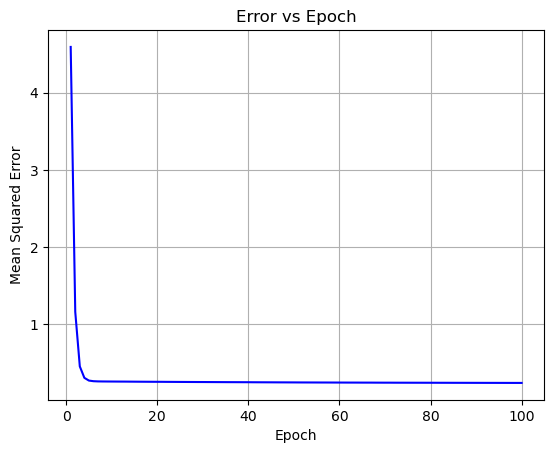

In [6]:
# Plotting the error vs epoch
plt.figure()
plt.plot(epochs, errors, color='b')
plt.title('Error vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

## Q2

In [7]:

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute the log-loss
def compute_log_loss(y, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient Descent for Logistic Regression
def logistic_regression_gd(x, y, learning_rate=0.01, epochs=100):
    m = len(y)
    x = np.c_[np.ones(m), x]  # Add intercept term
    theta = np.zeros(x.shape[1])  # Initialize parameters
    log_losses = []
    slopes = []

    for epoch in range(epochs):
        predictions = sigmoid(x.dot(theta))
        gradient = (1 / m) * x.T.dot(predictions - y)
        theta -= learning_rate * gradient
        
        # Compute log-loss
        log_loss = compute_log_loss(y, predictions)
        log_losses.append(log_loss)
        slopes.append(theta[1])  # Store the slope (theta[1])
    
    return slopes, log_losses


In [8]:
# Data with positive slope
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

# Data with negative slope
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])

# Run logistic regression with gradient descent
slopes_pos, log_losses_pos = logistic_regression_gd(x_pos, y_pos)
slopes_neg, log_losses_neg = logistic_regression_gd(x_neg, y_neg)

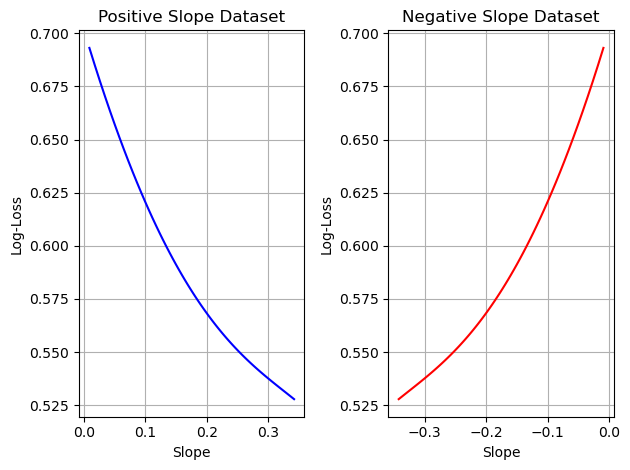

In [9]:
# Plot for positive slope
plt.subplot(1, 2, 1)
plt.plot(slopes_pos, log_losses_pos, color='b')
plt.title('Positive Slope Dataset')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.grid(True)

# Plot for negative slope
plt.subplot(1, 2, 2)
plt.plot(slopes_neg, log_losses_neg, color='r')
plt.title('Negative Slope Dataset')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

## Q3

In [11]:
# Load the dataset
df = pd.read_csv('salary.csv')

# Define features and target
X = df[['experience']].values  # Features (experience)
y = df['salary'].values  # Target variable (salary)

In [12]:
# Function to calculate Mean Squared Error (MSE) for given beta and intercept
def calculate_mse(beta, intercept):
    y_pred = beta * X.flatten() + intercept
    return mean_squared_error(y, y_pred)

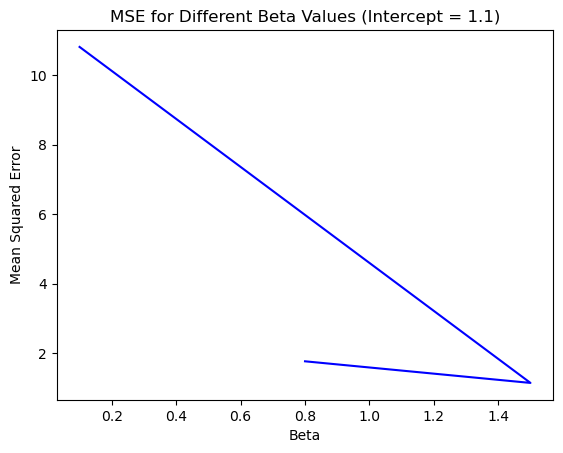

In [13]:
# a. Check for various values of beta with a fixed value of intercept
intercept = 1.1
betas = [0.1, 1.5, 0.8]
mse_values = [calculate_mse(beta, intercept) for beta in betas]

plt.figure()
plt.plot(betas, mse_values, color='b')
plt.title('MSE for Different Beta Values (Intercept = 1.1)')
plt.xlabel('Beta')
plt.ylabel('Mean Squared Error')
plt.show()

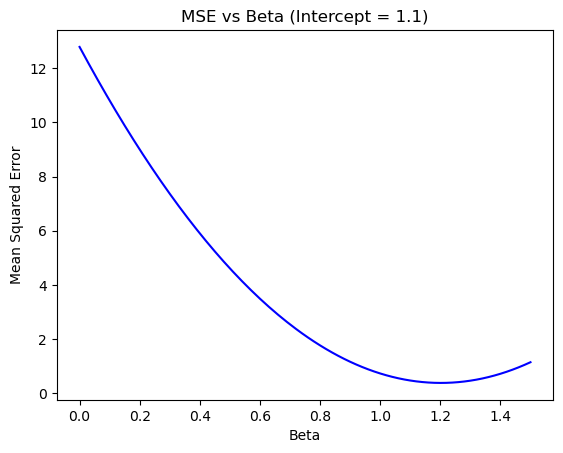

In [14]:
# b. Try with beta between 0 to 1.5 with an increment of 0.01, keeping intercept constant
beta_range = np.arange(0, 1.51, 0.01)
mse_range = [calculate_mse(beta, intercept) for beta in beta_range]

plt.figure()
plt.plot(beta_range, mse_range, color='b')
plt.title('MSE vs Beta (Intercept = 1.1)')
plt.xlabel('Beta')
plt.ylabel('Mean Squared Error')
plt.show()

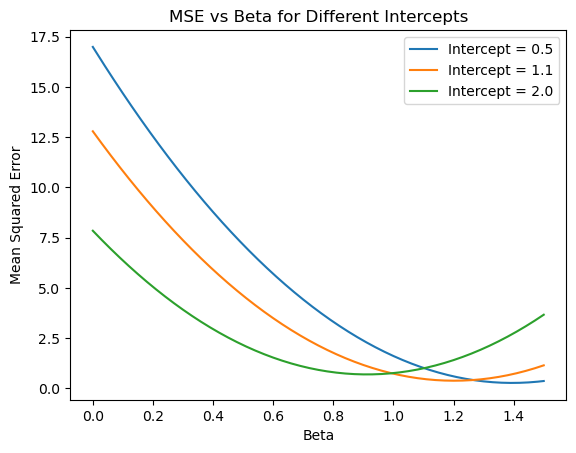

In [15]:
intercepts = [0.5, 1.1, 2.0]
plt.figure()

for intercept in intercepts:
    mse_range = [calculate_mse(beta, intercept) for beta in beta_range]
    plt.plot(beta_range, mse_range, label=f'Intercept = {intercept}')

plt.title('MSE vs Beta for Different Intercepts')
plt.xlabel('Beta')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

MSE using scikit-learn: 0.23366710810280558


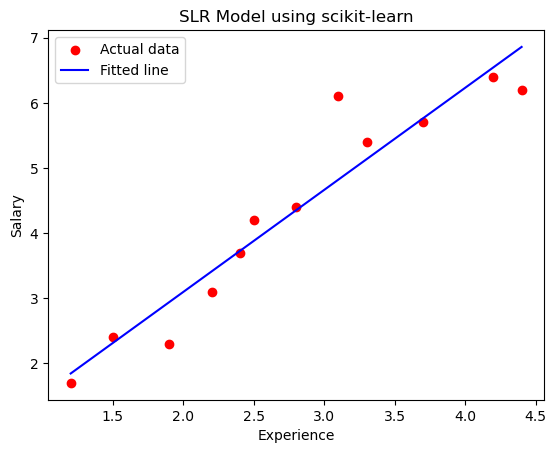

In [16]:
# d. Use scikit-learn to compare the results of MSE
# Fit the model using scikit-learn
model = LinearRegression()
model.fit(X, y)
y_pred_sklearn = model.predict(X)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)
print(f'MSE using scikit-learn: {mse_sklearn}')

# Plot the SLR model from scikit-learn
plt.figure()
plt.scatter(X, y, color='red', label='Actual data')
plt.plot(X, y_pred_sklearn, color='blue', label='Fitted line')
plt.title('SLR Model using scikit-learn')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

## Q4

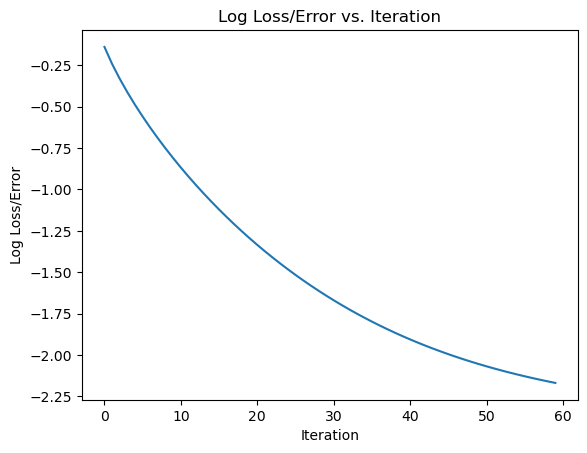

In [18]:
# Load the data
df = pd.read_csv('salary.csv')

# Scale the data
scaler = StandardScaler()
df[['salary', 'experience']] = scaler.fit_transform(df[['salary', 'experience']])

# Define the model
model = SGDRegressor(max_iter=5, tol=1e-6, eta0=0.01, random_state=42)

# Initialize lists to store the results
B0_values = []
B1_values = []
error_values = []

# Loop over 60 iterations
for _ in range(60):
    # Train the model for 5 epochs
    model.partial_fit(df[['experience']], df['salary'])

    # Get the coefficients (B0 and B1)
    B0 = model.intercept_
    B1 = model.coef_[0]

    # Calculate the mean squared error
    error = np.mean((model.predict(df[['experience']]) - df['salary']) ** 2)

    # Store the results
    B0_values.append(B0)
    B1_values.append(B1)
    error_values.append(error)

# Plot the graph of log loss/error versus iteration
plt.plot(range(60), np.log(error_values))
plt.xlabel('Iteration')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Iteration')
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor

# Define the model
model = SGDRegressor(max_iter=300, tol=1e-6, eta0=0.01, random_state=42)

# Fit the model
model.fit(df[['experience']], df['salary'])

# Get the coefficients (B0 and B1)
B0 = model.intercept_
B1 = model.coef_[0]

# Calculate the mean squared error
error = np.mean((model.predict(df[['experience']]) - df['salary']) ** 2)

print("B0:", B0)
print("B1:", B1)
print("Error:", error)

B0: [-5.49519744e-05]
B1: 0.9465851968877297
Error: 0.09161693170048395


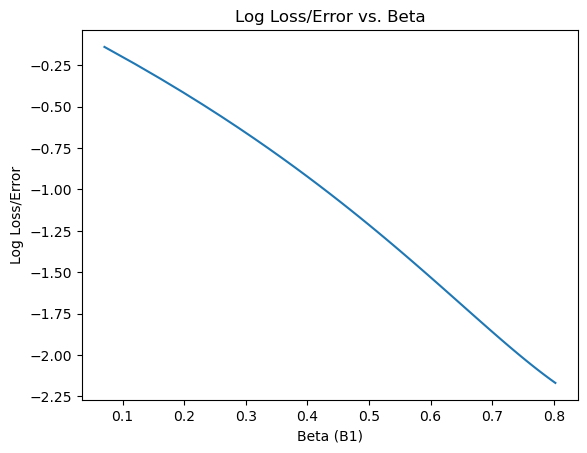

In [21]:
plt.plot(B1_values, np.log(error_values))
plt.xlabel('Beta (B1)')
plt.ylabel('Log Loss/Error')
plt.title('Log Loss/Error vs. Beta')
plt.show()

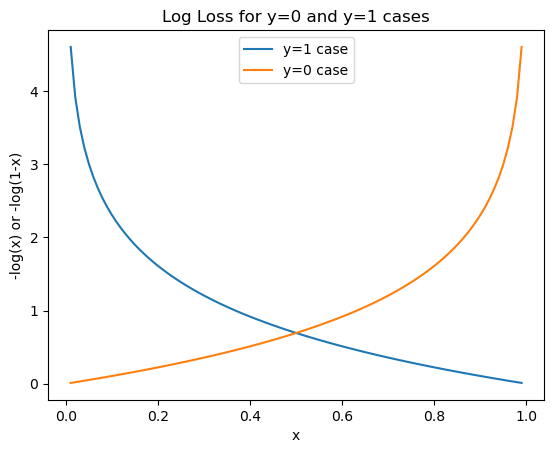

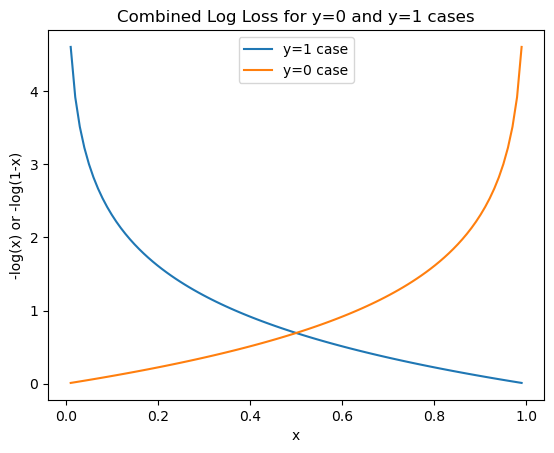

In [22]:
x = np.linspace(0.01, 0.99, 100)

plt.plot(x, -np.log(x), label='y=1 case')
plt.plot(x, -np.log(1-x), label='y=0 case')
plt.xlabel('x')
plt.ylabel('-log(x) or -log(1-x)')
plt.title('Log Loss for y=0 and y=1 cases')
plt.legend()
plt.show()

plt.plot(x, -np.log(x), label='y=1 case')
plt.plot(x, -np.log(1-x), label='y=0 case')
plt.xlabel('x')
plt.ylabel('-log(x) or -log(1-x)')
plt.title('Combined Log Loss for y=0 and y=1 cases')
plt.legend()
plt.show()

## Q5

In [23]:
# Define the datasets
x_positive = np.array([1, 2, 4, 3, 5])
y_positive = np.array([1, 3, 3, 2, 5])

x_negative = np.array([1, 2, 3, 4, 5])
y_negative = np.array([10, 8, 6, 4, 2])

In [24]:

# Function to compute Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Function to perform Gradient Descent
def gradient_descent(x, y, learning_rate=0.01, epochs=100):
    m = len(y)
    slope = np.random.rand()  # Initialize slope
    intercept = np.random.rand()  # Initialize intercept
    mse_history = []

    for epoch in range(epochs):
        # Predict y
        y_pred = slope * x + intercept

        # Compute the gradient
        error = y_pred - y
        slope_grad = (2 / m) * np.dot(error, x)
        intercept_grad = (2 / m) * np.sum(error)

        # Update the parameters
        slope -= learning_rate * slope_grad
        intercept -= learning_rate * intercept_grad

        # Compute MSE
        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)

    return slope, intercept, mse_history

# Perform Gradient Descent for Positive Slope Dataset
slope_positive, intercept_positive, mse_positive = gradient_descent(x_positive, y_positive, learning_rate=0.01, epochs=100)

# Perform Gradient Descent for Negative Slope Dataset
slope_negative, intercept_negative, mse_negative = gradient_descent(x_negative, y_negative, learning_rate=0.01, epochs=100)


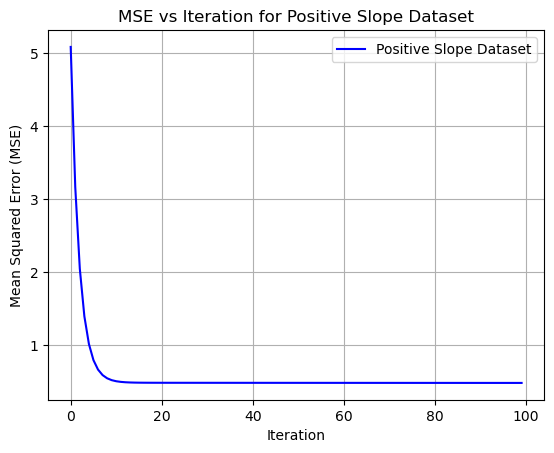

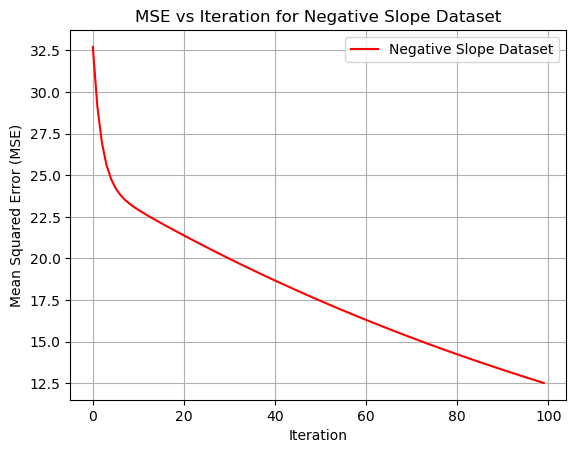

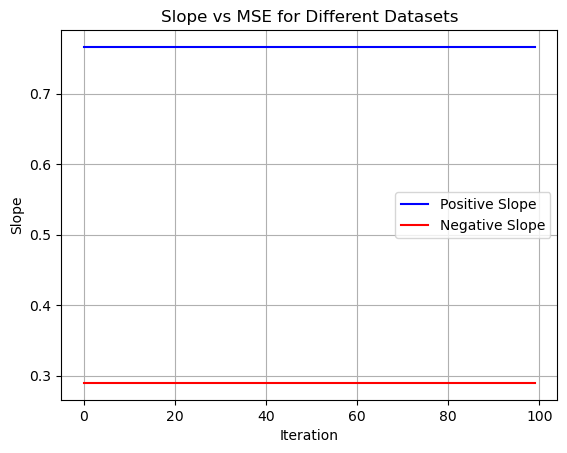

In [25]:
# Plot MSE vs Iteration for Positive Slope Dataset
plt.figure()
plt.plot(range(len(mse_positive)), mse_positive, label='Positive Slope Dataset', color='b')
plt.title('MSE vs Iteration for Positive Slope Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE vs Iteration for Negative Slope Dataset
plt.figure()
plt.plot(range(len(mse_negative)), mse_negative, label='Negative Slope Dataset', color='r')
plt.title('MSE vs Iteration for Negative Slope Dataset')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Slope vs MSE for both datasets
plt.figure()
plt.plot(range(len(mse_positive)), [slope_positive]*len(mse_positive), label='Positive Slope', color='b')
plt.plot(range(len(mse_negative)), [slope_negative]*len(mse_negative), label='Negative Slope', color='r')
plt.title('Slope vs MSE for Different Datasets')
plt.xlabel('Iteration')
plt.ylabel('Slope')
plt.legend()
plt.grid(True)
plt.show()